In [1]:
from datetime import datetime
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import chisquare
plt.style.use('ggplot')  # sets up pretty plots
%matplotlib inline
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 500)

In [2]:
df = pd.read_pickle('clean_data.pkl')

In [3]:
df.head()

,Name,RegistryCountry,CountryofOwner,Operator/Owner,Users,Purpose,ClassofOrbit,TypeofOrbit,Longitude of GEO (degrees),Perigee(km),Apogee(km),Eccentricity,Inclination(degrees),Period(minutes),LaunchMass(kg),DryMass(kg),Power(W),DateofLaunch,ExpectedLifetime,Contractor,CountryofContractor,LaunchSite,LaunchVehicle,COSPAR#,NORAD#
0,Aalto-1,NR (10/17),Finland,University of Aalto,Civil,Technology Development,LEO,NaN,0.00,497,517,0.001454,97.45,94.7,4.5,NaN,4.5,2017-06-23,2 yrs.,University of Aalto,Finland,Satish Dhawan Space Centre,PSLV,2017-036L,42775
1,AAUSat-4,NR (12/16),Denmark,University of Aalborg,Civil,Earth Observation,LEO,Sun-Synchronous,0.00,442,687,0.017665,98.20,95.9,1,NaN,NaN,2016-04-25,NaN,University of Aalborg,Denmark,Guiana Space Center,Soyuz 2.1a,2016-025E,41460
2,"ABS-2 (Koreasat-8, ST-3)",NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,GEO,NaN,75.00,35778,35793,0.000178,0.08,1436.03,6330,NaN,16000,2014-02-06,15 yrs.,Space Systems/Loral,USA,Guiana Space Center,Ariane 5 ECA,2014-006A,39508
3,ABS-2A,NR (12/16),Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,GEO,NaN,-75.00,35700,35700,0.000000,0.00,1436.1,1800,NaN,NaN,2016-06-15,15 yrs.,Boeing Satellite Systems,USA,Cape Canaveral,Falcon 9,2016-038A,41588
4,"ABS-3 (Agila 2, Mabuhay 1)",Philippines,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,GEO,NaN,146.06,35769,35802,0.000391,0.05,1436.07,3775,1800,9000,1997-08-19,15 yrs.,Space Systems/Loral,USA,Xichang Satellite Launch Center,Long March CZ3B,1997-042A,24901


## Chi2_Contingency Test

### Find if there is a dependence between the class of orbit and the purpose of satellites

In [5]:
df2 = df.groupby(['ClassofOrbit', 'Purpose']).count()['Name'].unstack().fillna(0)

In [6]:
df2.head()

Purpose,Communications,Earth Observation,Earth Science,Multipurpose,Navigation,Space Observation,Space Science,Technology Demonstration,Technology Development
ClassofOrbit,,,,,,,,,
Elliptical,10.0,8.0,0.0,0.0,0.0,0.0,18.0,0.0,3.0
GEO,453.0,39.0,0.0,5.0,24.0,4.0,1.0,0.0,5.0
LEO,249.0,533.0,22.0,26.0,0.0,5.0,46.0,13.0,171.0
MEO,13.0,0.0,0.0,0.0,84.0,0.0,0.0,0.0,0.0


In [7]:
from scipy.stats import chi2_contingency

In [8]:
chi2_contingency(df2)

(1982.6380915985555,
 0.0,
 24,
 array([[1.63250577e+01, 1.30600462e+01, 4.95381062e-01, 6.98036952e-01,
         2.43187067e+00, 2.02655889e-01, 1.46362587e+00, 2.92725173e-01,
         4.03060046e+00],
        [2.22271940e+02, 1.77817552e+02, 6.74480370e+00, 9.50404157e+00,
         3.31108545e+01, 2.75923788e+00, 1.99278291e+01, 3.98556582e+00,
         5.48781755e+01],
        [4.45799654e+02, 3.56639723e+02, 1.35277136e+01, 1.90617783e+01,
         6.64087760e+01, 5.53406467e+00, 3.99682448e+01, 7.99364896e+00,
         1.10066397e+02],
        [4.06033487e+01, 3.24826790e+01, 1.23210162e+00, 1.73614319e+00,
         6.04849885e+00, 5.04041570e-01, 3.64030023e+00, 7.28060046e-01,
         1.00248268e+01]]))

P-value < 0.05 so there is no dependence.

### Find if there is a dependence between the users and the purpose of the satellites



In [9]:
df3 = pd.crosstab(df['Users'], df['Purpose'])

In [10]:
df3.head()

Purpose,Communications,Earth Observation,Earth Science,Multipurpose,Navigation,Space Observation,Space Science,Technology Demonstration,Technology Development
Users,,,,,,,,,
Civil,18,13,16,9,0,0,8,2,62
Commercial,428,275,1,7,18,0,0,5,34
Commercial/Government/Military,1,0,0,0,0,0,0,0,0
Government,56,160,3,10,10,1,43,3,51
Government/Civil,0,12,0,1,0,0,11,0,1


In [11]:
chi2_contingency(df3)

(1919.3188313207622,
 0.0,
 72,
 array([[5.35796767e+01, 4.28637413e+01, 1.62586605e+00, 2.29099307e+00,
         7.98152425e+00, 6.65127021e-01, 4.80369515e+00, 9.60739030e-01,
         1.32286374e+01],
        [3.21478060e+02, 2.57182448e+02, 9.75519630e+00, 1.37459584e+01,
         4.78891455e+01, 3.99076212e+00, 2.88221709e+01, 5.76443418e+00,
         7.93718245e+01],
        [4.18591224e-01, 3.34872979e-01, 1.27020785e-02, 1.78983834e-02,
         6.23556582e-02, 5.19630485e-03, 3.75288684e-02, 7.50577367e-03,
         1.03348730e-01],
        [1.41065242e+02, 1.12852194e+02, 4.28060046e+00, 6.03175520e+00,
         2.10138568e+01, 1.75115473e+00, 1.26472286e+01, 2.52944573e+00,
         3.48285219e+01],
        [1.04647806e+01, 8.37182448e+00, 3.17551963e-01, 4.47459584e-01,
         1.55889145e+00, 1.29907621e-01, 9.38221709e-01, 1.87644342e-01,
         2.58371824e+00],
        [4.77193995e+01, 3.81755196e+01, 1.44803695e+00, 2.04041570e+00,
         7.10854503e+00, 5.92378753

P-value < 0.05 so there is no dependence

### Find if there is a dependence between the country of owner and the users of satellites

In [12]:
df4 = pd.crosstab(df['CountryofOwner'], df['Users'])
df4

Users,Civil,Commercial,Commercial/Government/Military,Government,Government/Civil,Government/Commercial,Military,Military/Civil,Military/Commercial,Military/Government
CountryofOwner,,,,,,,,,,
Algeria,0,0,0,4,0,0,0,0,0,0
Argentina,1,10,0,0,0,0,0,0,0,0
Australia,2,6,0,0,0,0,0,0,1,0
Austria,1,0,0,0,0,0,0,0,0,0
Azerbaijan,0,0,0,1,0,0,0,0,0,0
Bangladesh,1,0,0,0,0,0,0,0,0,0
Belarus,0,0,0,2,0,0,0,0,0,0
Belgium,1,0,0,0,0,0,0,0,0,0
Bolivia,0,0,0,1,0,0,0,0,0,0


In [13]:
chi2_contingency(df4)

(1877.5784835934967,
 1.2293894344470572e-144,
 549,
 array([[2.95612009e-01, 1.77367206e+00, 2.30946882e-03, 7.78290993e-01,
         5.77367206e-02, 2.63279446e-01, 5.93533487e-01, 4.61893764e-03,
         1.59353349e-01, 7.15935335e-02],
        [8.12933025e-01, 4.87759815e+00, 6.35103926e-03, 2.14030023e+00,
         1.58775982e-01, 7.24018476e-01, 1.63221709e+00, 1.27020785e-02,
         4.38221709e-01, 1.96882217e-01],
        [6.65127021e-01, 3.99076212e+00, 5.19630485e-03, 1.75115473e+00,
         1.29907621e-01, 5.92378753e-01, 1.33545035e+00, 1.03926097e-02,
         3.58545035e-01, 1.61085450e-01],
        [7.39030023e-02, 4.43418014e-01, 5.77367206e-04, 1.94572748e-01,
         1.44341801e-02, 6.58198614e-02, 1.48383372e-01, 1.15473441e-03,
         3.98383372e-02, 1.78983834e-02],
        [7.39030023e-02, 4.43418014e-01, 5.77367206e-04, 1.94572748e-01,
         1.44341801e-02, 6.58198614e-02, 1.48383372e-01, 1.15473441e-03,
         3.98383372e-02, 1.78983834e-02],
       

P-value > 0.05 so there is a dependence

## T-Test

This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values.

In [15]:
from scipy.stats import ttest_ind

Does the perigee of government users and commercil users have identical expected values?

In [16]:
ttest_ind(df[df['Users']=='Government']['Perigee(km)'].values, df[df['Users']=='Commercial']['Perigee(km)'].values)

Ttest_indResult(statistic=-5.062964684498051, pvalue=4.8343055471509e-07)

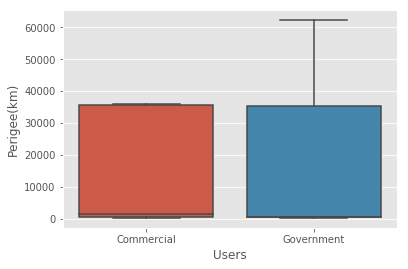

In [18]:
sns.boxplot(data=df[(df['Users']=='Government')|(df['Users']=='Commercial')], x='Users',y='Perigee(km)')

Since the p-value < 0.05 we reject the null-hypothesis that commercial and government perigee of satellites have identical averages. 

Does the perigee of government users and civil users have identical expected values?

In [20]:
ttest_ind(df[df['Users']=='Civil']['Perigee(km)'].values, df[df['Users']=='Government']['Perigee(km)'].values)

Ttest_indResult(statistic=-6.957478714265769, pvalue=1.1883430917920776e-11)

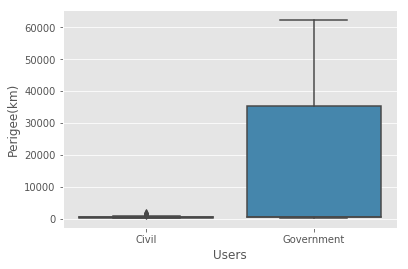

In [22]:
sns.boxplot(data=df[(df['Users']=='Government')|(df['Users']=='Civil')], x='Users',y='Perigee(km)')

Since the p-value < 0.05 we reject the null-hypothesis that civil and government perigee of satellites have identical averages. 

Does the perigee of communication and navigation satellites have identical expected values?

In [23]:
ttest_ind(df[df['Purpose']=='Communications']['Perigee(km)'].values, df[df['Purpose']=='Navigation']['Perigee(km)'].values)

Ttest_indResult(statistic=-0.5766207126892763, pvalue=0.5643518557875169)

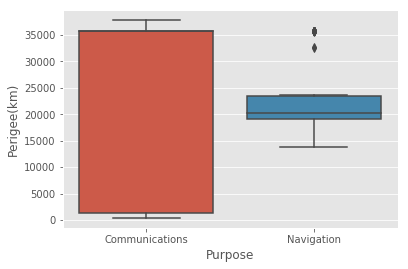

In [25]:
sns.boxplot(data=df[(df['Purpose']=='Communications')|(df['Purpose']=='Navigation')], x='Purpose',y='Perigee(km)')

Since the p-value > 0.05 we accept the null-hypothesis that communication and nvigation perigee of satellites have identical averages. 

## Pearson Correlation Coeffiecient

In [26]:
from scipy.stats import pearsonr

### Correlation between eccentricity and perigee

In [27]:
pearsonr(df['Eccentricity'], df['Perigee(km)'])

(-0.06237793530832643, 0.009413608844917824)

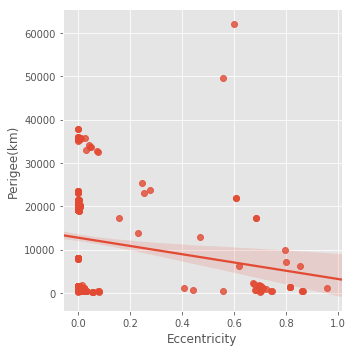

In [28]:
sns.lmplot('Eccentricity', 'Perigee(km)', df)

There is a negative correlation and since the p-value < 0.05 it is signficant

### Correlaton between apogee and eccentricity

In [29]:
pearsonr(df['Eccentricity'], df['Apogee(km)'])

(0.46432803267268935, 2.454046974882121e-93)

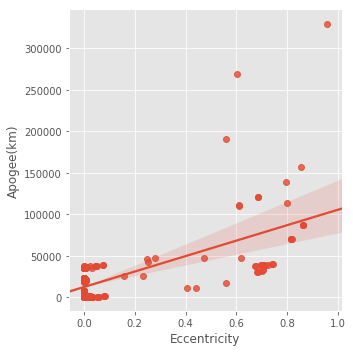

In [30]:
sns.lmplot('Eccentricity', 'Apogee(km)', df)

There is a positive correlation and since the p-value is less than 0.05 it is statistically significant

### Correlaton between apogee and eccentricity

In [31]:
pearsonr(df['Perigee(km)'], df['Apogee(km)'])

(0.763829080558334, 0.0)

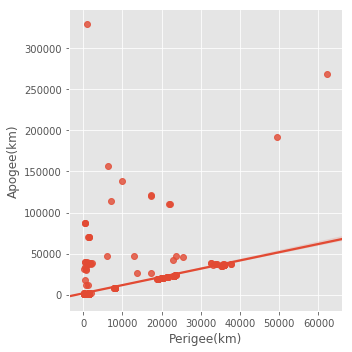

In [32]:
sns.lmplot('Perigee(km)', 'Apogee(km)', df)

There is a positive correlation and since the p-value is less than 0.05 it is statistically significant